In [31]:
import psycopg2
import configparser
import pandas as pd
import pandas.io.sql as psql
import numpy as np

config = configparser.ConfigParser()
config.read('../config.ini')

conn = psycopg2.connect(
    dbname   = config['database']['dbname'],
    user     = config['database']['user'],
    password = config['database']['password'],
    host     = config['database']['host'],
    port     = config['database']['port']
)

sql_query = """
SELECT p.subject_id
    , i.hadm_id
    , i.stay_id
    , i.first_careunit
    , i.last_careunit
    , i.intime
    , i.outtime
    , i.los
    , a.admittime
    , a.dischtime
    , a.deathtime
    , a.admission_type
    , a.admit_provider_id
    , a.admission_location
    , a.discharge_location
    , a.insurance
    , a.language
    , a.marital_status
    , a.race
    , a.edregtime
    , a.edouttime
    , a.hospital_expire_flag
    , p.gender
    , p.anchor_year
    , p.anchor_year_group
    , p.dod
    , d.icd_code
    , d.icd_version
    , EXTRACT(DAYS FROM a.dischtime - a.admittime)        AS days_admitted
    , CASE WHEN a.deathtime IS NOT NULL THEN 1 ELSE 0 END AS died
FROM mimic_data.icustays i
JOIN mimic_data.admissions a ON i.hadm_id = a.hadm_id
JOIN mimic_data.patients p ON p.subject_id = a.subject_id
JOIN mimic_data.diagnoses_icd d ON p.subject_id = d.subject_id AND a.hadm_id = d.hadm_id
WHERE d.icd_version = 10
AND (
    d.icd_code LIKE 'I61%' OR
    d.icd_code LIKE 'I63%' OR
    d.icd_code LIKE 'G41%'
);
"""

df = psql.read_sql(sql_query, conn)

/var/folders/81/7fnwbfsd4k74611qsdzs_mcc0000gn/T/ipykernel_17695/2085450031.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = psql.read_sql(sql_query, conn)


In [16]:
df

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admittime,dischtime,...,edouttime,hospital_expire_flag,gender,anchor_year,anchor_year_group,dod,icd_code,icd_version,days_admitted,died
0,10004113,29879900,39774222,Neuro Stepdown,Neuro Stepdown,2173-03-20 20:16:36,2173-03-21 21:43:59,1.060683,2173-03-20 00:00:00,2173-03-22 14:35:00,...,None,0,M,2173,2014 - 2016,None,I619,10,2.0,0
1,10020349,21891870,33383880,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2151-06-12 14:32:00,2151-06-21 11:35:55,8.877720,2151-06-12 13:03:00,2151-06-28 12:56:00,...,2151-06-12 14:32:00,0,F,2151,2020 - 2022,None,I6302,10,15.0,0
2,10020349,21891870,33383880,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2151-06-12 14:32:00,2151-06-21 11:35:55,8.877720,2151-06-12 13:03:00,2151-06-28 12:56:00,...,2151-06-12 14:32:00,0,F,2151,2020 - 2022,None,I63012,10,15.0,0
3,10034171,28485870,34728076,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2119-04-25 16:43:04,2119-04-26 23:44:01,1.292326,2119-04-24 16:49:00,2119-04-26 22:06:00,...,2119-04-24 18:19:00,1,F,2119,2017 - 2019,2119-04-26,I63131,10,2.0,1
4,10034171,28485870,34728076,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2119-04-25 16:43:04,2119-04-26 23:44:01,1.292326,2119-04-24 16:49:00,2119-04-26 22:06:00,...,2119-04-24 18:19:00,1,F,2119,2017 - 2019,2119-04-26,I63411,10,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,19982539,23136520,30148627,Neuro Intermediate,Neuro Intermediate,2175-05-19 17:36:37,2175-06-04 12:15:26,15.776956,2175-04-23 09:31:00,2175-06-04 12:10:00,...,2175-04-23 09:29:00,0,M,2175,2017 - 2019,None,I63412,10,42.0,0
6307,19983145,29647630,32632327,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2158-12-28 22:47:24,2158-12-30 15:29:53,1.696169,2158-12-28 22:46:00,2159-01-08 16:15:00,...,None,0,F,2158,2014 - 2016,None,I63411,10,10.0,0
6308,19985409,27293537,32597806,Neuro Intermediate,Neuro Intermediate,2154-09-21 23:11:28,2154-09-28 14:44:53,6.648206,2154-09-21 20:49:00,2154-09-28 14:39:00,...,2154-09-22 00:33:00,0,M,2154,2017 - 2019,None,I636,10,6.0,0
6309,19987702,26568899,34859288,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Surgical Intensive Care Unit (Neuro SICU),2131-01-15 22:29:48,2131-01-17 21:26:29,1.956030,2131-01-13 16:45:00,2131-01-23 15:00:00,...,2131-01-13 18:31:00,0,M,2131,2017 - 2019,None,I63412,10,9.0,0


In [33]:
#encoding
# from sklearn.preprocessing import OneHotEncoder

careunit_dict = {
    'Medicine': 0,
    'Surgical Intensive Care Unit (SICU)': 1,
    'Surgery/Vascular/Intermediate': 2,
    'Neuro Stepdown': 3,
    'PACU': 4,
    'Medical Intensive Care Unit (MICU)': 5,
    'Surgery/Trauma': 6,
    'Med/Surg': 7,
    'Medical/Surgical Intensive Care Unit (MICU/SICU)': 8,
    'Coronary Care Unit (CCU)': 9,
    'Medicine/Cardiology Intermediate': 10,
    'Neuro Intermediate': 11,
    'Neuro Surgical Intensive Care Unit (Neuro SICU)': 12,
    'Cardiac Vascular Intensive Care Unit (CVICU)': 13,
    'Trauma SICU (TSICU)': 14,
    'Intensive Care Unit (ICU)': 15,
    'Neurology': 16
}

df["first_careunit_o"] = df.first_careunit.map(careunit_dict)
df["last_careunit_o"] = df.first_careunit.map(careunit_dict)

admission_type_dict = {
    'AMBULATORY OBSERVATION': 0,
    'DIRECT EMER.': 1,
    'DIRECT OBSERVATION': 2,
    'ELECTIVE': 3,
    'EU OBSERVATION': 4,
    'EW EMER.': 5,
    'OBSERVATION ADMIT': 6,
    'SURGICAL SAME DAY ADMISSION': 7,
    'URGENT': 8
}

df["admission_type_o"] = df.admission_type.map(admission_type_dict)

admission_location_dict = {
    'AMBULATORY SURGERY TRANSFER': 0,
    'CLINIC REFERRAL': 1,
    'EMERGENCY ROOM': 2,
    'INFORMATION NOT AVAILABLE': 3,
    'INTERNAL TRANSFER TO OR FROM PSYCH': 4,
    'PACU': 5,
    'PHYSICIAN REFERRAL': 6,
    'PROCEDURE SITE': 7,
    'TRANSFER FROM HOSPITAL': 8,
    'TRANSFER FROM SKILLED NURSING FACILITY': 9,
    'WALK-IN/SELF REFERRAL': 10
}

df["admission_location_o"] = df.admission_location.map(admission_location_dict)

discharge_location_dict = {
    'ACUTE HOSPITAL': 0,
    'AGAINST ADVICE': 1,
    'ASSISTED LIVING': 2,
    'CHRONIC/LONG TERM ACUTE CARE': 3,
    'DIED': 4,
    'HEALTHCARE FACILITY': 5,
    'HOME': 6,
    'HOME HEALTH CARE': 7,
    'HOSPICE': 8,
    'OTHER FACILITY': 9,
    'PSYCH FACILITY': 10,
    'REHAB': 11,
    'SKILLED NURSING FACILITY': 12

}

df["discharge_location_o"] = df.discharge_location.map(discharge_location_dict)

insurance_dict = {
    'Medicaid': 0,
    'Medicare': 1,
    'No charge': 2,
    'Other': 3,
    'Private': 4
}

df["insurance_o"] = df.insurance.map(insurance_dict)

language_dict = {
    'American Sign Language': 0,
    'Amharic': 1,
    'Arabic': 2,
    'Armenian': 3,
    'Bengali': 4,
    'Chinese': 5,
    'English': 6,
    'French': 7,
    'Haitian': 8,
    'Hindi': 9,
    'Italian': 10,
    'Japanese': 11,
    'Kabuverdianu': 12,
    'Khmer': 13,
    'Korean': 14,
    'Modern Greek (1453-)': 15,
    'Other': 16,
    'Persian': 17,
    'Polish': 18,
    'Portuguese': 19,
    'Russian': 20,
    'Somali': 21,
    'Spanish': 22,
    'Thai': 23,
    'Vietnamese': 24

}

df["language_o"] = df.language.map(language_dict)

df = pd.get_dummies(df, columns=['marital_status'])

df = pd.get_dummies(df, columns=['race'])

df = pd.get_dummies(df, columns=['gender'])

df = pd.get_dummies(df, columns=['anchor_year_group'])

df['icd_code_numeric'] = df['icd_code'].replace({
    r'^I61.*': 0,   # Match codes starting with 'I61'
    r'^I63.*': 1,   # Match codes starting with 'I63'
    r'^G41.*': 2    # Match codes starting with 'G41'
}, regex=True)

/var/folders/81/7fnwbfsd4k74611qsdzs_mcc0000gn/T/ipykernel_17695/2296290416.py:127: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['icd_code_numeric'] = df['icd_code'].replace({


In [34]:
df

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admittime,dischtime,...,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,gender_F,gender_M,anchor_year_group_2008 - 2010,anchor_year_group_2011 - 2013,anchor_year_group_2014 - 2016,anchor_year_group_2017 - 2019,anchor_year_group_2020 - 2022,icd_code_numeric
0,10004113,29879900,39774222,Neuro Stepdown,Neuro Stepdown,2173-03-20 20:16:36,2173-03-21 21:43:59,1.060683,2173-03-20 00:00:00,2173-03-22 14:35:00,...,False,False,False,True,False,False,True,False,False,0
1,10010888,20162667,33318955,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2174-01-09 00:21:00,2174-01-18 00:48:41,9.019225,2174-01-09 22:19:00,2174-01-27 16:00:00,...,False,False,False,True,False,False,False,False,True,1
2,10013310,22098926,32769810,Neuro Intermediate,Neuro Intermediate,2153-06-10 11:55:42,2153-06-16 19:03:14,6.296898,2153-06-10 11:55:00,2153-07-21 18:00:00,...,False,False,True,False,False,False,False,True,False,1
3,10013310,22098926,32769810,Neuro Intermediate,Neuro Intermediate,2153-06-10 11:55:42,2153-06-16 19:03:14,6.296898,2153-06-10 11:55:00,2153-07-21 18:00:00,...,False,False,True,False,False,False,False,True,False,0
4,10020349,21891870,33383880,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2151-06-12 14:32:00,2151-06-21 11:35:55,8.877720,2151-06-12 13:03:00,2151-06-28 12:56:00,...,False,False,True,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,19981702,24857379,30970261,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2111-11-17 18:47:40,2111-11-20 17:47:57,2.958530,2111-11-17 18:46:00,2111-11-24 12:20:00,...,False,False,True,False,False,False,True,False,False,1
6307,19982539,23136520,31123584,Neuro Intermediate,Neuro Intermediate,2175-04-23 13:28:52,2175-05-13 10:22:21,19.870475,2175-04-23 09:31:00,2175-06-04 12:10:00,...,False,False,False,True,False,False,False,True,False,1
6308,19982539,23136520,30148627,Neuro Intermediate,Neuro Intermediate,2175-05-19 17:36:37,2175-06-04 12:15:26,15.776956,2175-04-23 09:31:00,2175-06-04 12:10:00,...,False,False,False,True,False,False,False,True,False,1
6309,19983145,29647630,32632327,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2158-12-28 22:47:24,2158-12-30 15:29:53,1.696169,2158-12-28 22:46:00,2159-01-08 16:15:00,...,False,False,True,False,False,False,True,False,False,1


In [38]:
#drop original categorical columns

df.drop(columns=[
    'first_careunit',
    'last_careunit',
    'admission_type',
    'admit_provider_id',
    'admission_location',
    'discharge_location',
    'insurance',
    'language',
    'dod',
    'icd_code',
    'icd_version',

    #timestamp columns
    'intime',
    'outtime',
    'admittime',
    'dischtime',
    'deathtime',
    'edregtime',
    'edouttime'
], inplace=True, axis=1)

<Axes: >

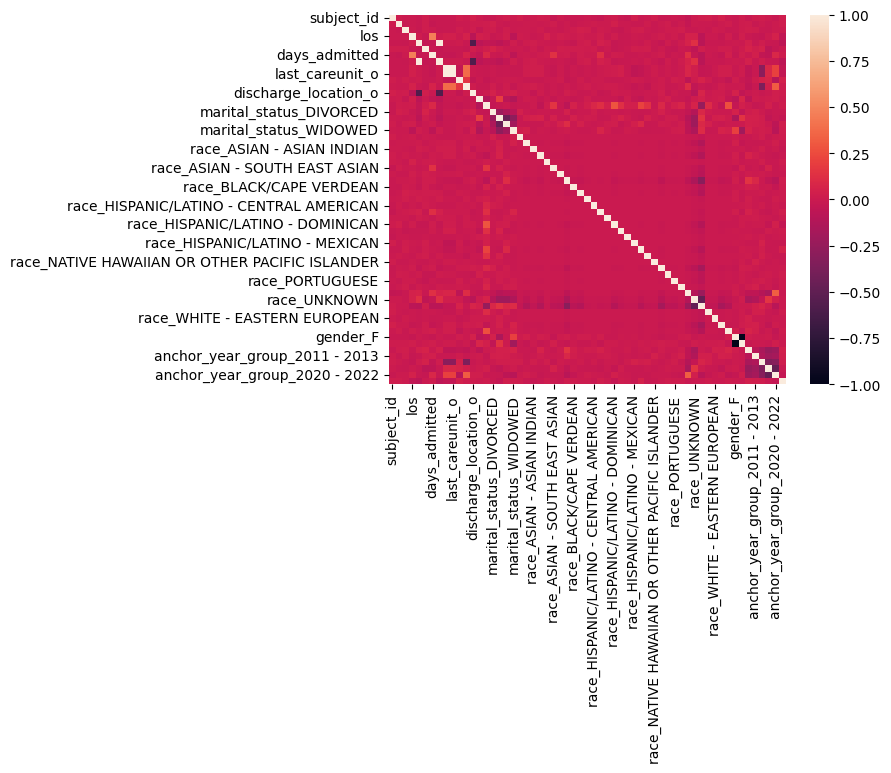

In [40]:
import seaborn as sns
%matplotlib inline

corr = df.corr()

sns.heatmap(corr)

In [42]:
df.shape

(6311, 59)

In [57]:
#predicting los

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

def rmse(y_true, y_pred):
    differences = y_pred - y_true
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()

    return np.sqrt(mean_of_differences_squared) 

cur_df = df.copy()
cur_df = cur_df.dropna()

X = cur_df.drop('los', axis=1)
y = cur_df['los']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scorer = make_scorer(rmse, greater_is_better=False)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=False)

results = []

for i, (name, model) in enumerate(models.items()):
    if 'SVR' in name:
        cv_rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=rmse_scorer)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=scorer)
        cv_mae_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=mae_scorer)
        cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)
    else:
        cv_rmse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmse_scorer)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        cv_mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=mae_scorer)
        cv_r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=r2_scorer)

    results.append({'model': name, 'RMSE': -np.mean(cv_rmse_scores), 'MAE': -np.mean(cv_mae_scores), 'R2': -np.mean(cv_r2_scores)})
    print(f"{name}: Mean MSE (cross-validated) = {-np.mean(cv_scores)}")
    print(f"{name}: Mean MAE (cross-validated) = {-np.mean(cv_mae_scores)}")
    print(f"{name}: Mean R^2 (cross-validated) = {-np.mean(cv_r2_scores)}")


# model = LinearRegression()

# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Cross-validation R² scores:", cv_scores)
# print("Mean cross-validation R² score:", cv_scores.mean())
# print("Test set Mean Squared Error:", mse)
# print("Test set R² score:", r2)

Linear Regression: Mean MSE (cross-validated) = 50.124173171651606
Linear Regression: Mean MAE (cross-validated) = 4.459534773899202
Linear Regression: Mean R^2 (cross-validated) = 0.20759883914811822
Ridge Regression: Mean MSE (cross-validated) = 49.99083250733889
Ridge Regression: Mean MAE (cross-validated) = 4.4547096437231195
Ridge Regression: Mean R^2 (cross-validated) = 0.20957689675974694


/Users/agabitashvili/PycharmProjects/Thesis_MIMIC-IV_neurological_disorders/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.25031e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/agabitashvili/PycharmProjects/Thesis_MIMIC-IV_neurological_disorders/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31749e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/agabitashvili/PycharmProjects/Thesis_MIMIC-IV_neurological_disorders/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.24212e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/agabitashvili/PycharmProjects/Thesis_MIMIC-IV_neurological_disorders/venv/lib/python3.10/site-packa

Lasso Regression: Mean MSE (cross-validated) = 49.58138477665953
Lasso Regression: Mean MAE (cross-validated) = 4.409798000181724
Lasso Regression: Mean R^2 (cross-validated) = 0.21540489880581043
Support Vector Regression: Mean MSE (cross-validated) = 71.05999226844168
Support Vector Regression: Mean MAE (cross-validated) = 4.578776545825257
Support Vector Regression: Mean R^2 (cross-validated) = -0.12005891587977886
Decision Tree Regression: Mean MSE (cross-validated) = 53.15144696814866
Decision Tree Regression: Mean MAE (cross-validated) = 4.045035215439441
Decision Tree Regression: Mean R^2 (cross-validated) = 0.1659998494837037
Random Forest Regression: Mean MSE (cross-validated) = 38.50467912200474
Random Forest Regression: Mean MAE (cross-validated) = 3.241524553987194
Random Forest Regression: Mean R^2 (cross-validated) = 0.40923828043233235
Gradient Boosting Regression: Mean MSE (cross-validated) = 42.9788361200977
Gradient Boosting Regression: Mean MAE (cross-validated) = 3.

In [58]:
res_df = pd.DataFrame(columns=['model', 'RMSE', 'MAE', 'R2'], data=results)
res_df

,model,RMSE,MAE,R2
0,Linear Regression,7.074500,4.459535,0.207599
1,Ridge Regression,7.065105,4.454710,0.209577
2,Lasso Regression,7.035859,4.409798,0.215405
3,Support Vector Regression,8.420715,4.578777,-0.120059
4,Decision Tree Regression,7.247948,4.045035,0.166000
5,Random Forest Regression,6.170831,3.241525,0.409238
6,Gradient Boosting Regression,6.544352,3.709077,0.323244
